In [0]:
#-------------------Deep learning miniproject 2---------------------------
#author : hamze ghaedi----------------------------------------------------
#--------------------------------------------------------------------------

#----------------------------IMPORTS---------------------------------------
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as pimg
from skimage import color



In [3]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train / 255
x_test = x_test / 255



Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


In [4]:
def dechromize(x):
  y = np.zeros((len(x),32,32))
  for i in range(0,len(x)):
    y[i] = color.rgb2gray(x[i])
  return y

print(x_train.shape)
x_train = dechromize(x_train)
x_test = dechromize(x_test)



(50000, 32, 32, 3)


In [0]:
x_train.shape = (50000,32,32,1)
x_test.shape = (10000,32,32,1)
#-------------------normalization----------------------
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
#------------------------------------------------------

x_val = x_train[:5000]
y_val = y_train[:5000]

x_train = x_train[5000:]
y_train = y_train[5000:]

In [6]:
#----------------------Convolutional network------------------------------
CNN_model = keras.models.Sequential([
                                 
                                 keras.layers.Conv2D(32,(3,3),input_shape=(32,32,1),activation='elu',padding='same',kernel_regularizer=
                                                     keras.regularizers.l2(l=0.0001)),
                                 keras.layers.BatchNormalization(),    
                                 keras.layers.Conv2D(32,(3,3),activation='elu',padding='same',kernel_regularizer=
                                                     keras.regularizers.l2(l=0.00001)),
                                 keras.layers.BatchNormalization(), 
                                 keras.layers.MaxPooling2D((2,2)),
                                 keras.layers.Dropout(rate=0.2),
                                 keras.layers.Conv2D(64,(3,3),activation='elu',padding='same',kernel_regularizer=
                                                     keras.regularizers.l2(l=0.00001)),
                                 keras.layers.BatchNormalization(),    
                                 keras.layers.Conv2D(64,(3,3),activation='elu',padding='same',kernel_regularizer=
                                                     keras.regularizers.l2(l=0.00001)),
                                 keras.layers.BatchNormalization(), 
                                 keras.layers.MaxPooling2D((2,2)),
                                 keras.layers.Dropout(rate=0.3),

                                 keras.layers.Flatten(),
                                 keras.layers.Dense(256,activation='elu'),                                      
                                 keras.layers.Dense(10,activation='elu')
])

#--------------------------------------------------------------------------
cb = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=5)
CNN_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
,loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
CNN_model.fit(x_train,y_train,batch_size = 32,epochs = 50,validation_data = (x_val,y_val),callbacks=[cb])

#--------------------------------------------------------------------------


Epoch 1/50
1407/1407 [==============================] - 310s 220ms/step - loss: 1.7914 - accuracy: 0.3951 - val_loss: 1.3644 - val_accuracy: 0.5522
Epoch 2/50
1407/1407 [==============================] - 315s 224ms/step - loss: 1.2371 - accuracy: 0.5782 - val_loss: 1.1262 - val_accuracy: 0.6270
Epoch 3/50
1407/1407 [==============================] - 313s 222ms/step - loss: 1.0402 - accuracy: 0.6420 - val_loss: 0.9506 - val_accuracy: 0.6772
Epoch 4/50
1407/1407 [==============================] - 304s 216ms/step - loss: 0.9164 - accuracy: 0.6884 - val_loss: 0.9696 - val_accuracy: 0.6784
Epoch 5/50
1407/1407 [==============================] - 311s 221ms/step - loss: 0.8181 - accuracy: 0.7196 - val_loss: 0.8657 - val_accuracy: 0.7110
Epoch 6/50
1407/1407 [==============================] - 314s 223ms/step - loss: 0.7422 - accuracy: 0.7462 - val_loss: 0.8431 - val_accuracy: 0.7186
Epoch 7/50
1407/1407 [==============================] - 309s 220ms/step - loss: 0.6761 - accuracy: 0.7701 - val_

In [58]:
#-------------------------Feedforward network------------------------------

FFN_model = keras.models.Sequential([
                                     
                                     keras.layers.Flatten(input_shape=(32,32,1)),
                                     keras.layers.Dense(256,activation='elu',kernel_regularizer=keras.regularizers.l2(0.001)), 
                                     keras.layers.BatchNormalization(),
                                     keras.layers.Dropout(rate = 0.5),
                                     keras.layers.Dense(64,activation='elu',kernel_regularizer=keras.regularizers.l2(0.001)),                                       
                                     keras.layers.Dense(10,activation='elu')
])
cb = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=10)
FFN_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
FFN_model.fit(x_train,y_train,batch_size = 64,epochs = 100,validation_data = (x_val,y_val),callbacks=[cb])




Epoch 1/100
704/704 [==============================] - 5s 7ms/step - loss: 2.8249 - accuracy: 0.2244 - val_loss: 2.4475 - val_accuracy: 0.3286
Epoch 2/100
704/704 [==============================] - 5s 7ms/step - loss: 2.5570 - accuracy: 0.2813 - val_loss: 2.3455 - val_accuracy: 0.3534
Epoch 3/100
704/704 [==============================] - 5s 7ms/step - loss: 2.4412 - accuracy: 0.3076 - val_loss: 2.2719 - val_accuracy: 0.3650
Epoch 4/100
704/704 [==============================] - 5s 7ms/step - loss: 2.3549 - accuracy: 0.3279 - val_loss: 2.2123 - val_accuracy: 0.3838
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 2.2921 - accuracy: 0.3415 - val_loss: 2.1706 - val_accuracy: 0.3866
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 2.2371 - accuracy: 0.3517 - val_loss: 2.1339 - val_accuracy: 0.3882
Epoch 7/100
704/704 [==============================] - 5s 7ms/step - loss: 2.1904 - accuracy: 0.3622 - val_loss: 2.0929 - val_accuracy: 0.4002

In [0]:
import matplotlib.pyplot as plt
def visualize(hist):
  plt.figure()
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Accuracy')
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend(['Train', 'Test'], loc='lower right')
  plt.show()
  plt.figure()
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='lower right')
  plt.show()
 

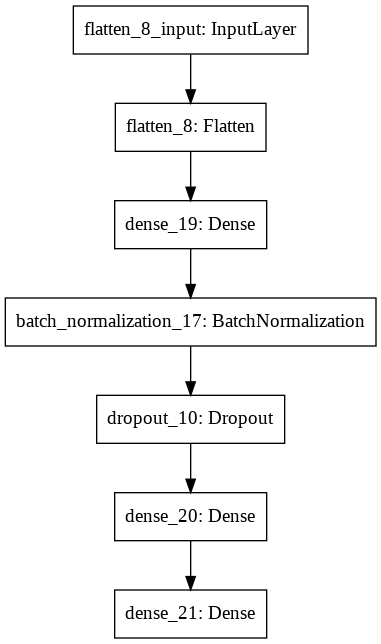

In [25]:
from IPython.display import SVG

keras.utils.plot_model(FFN_model,to_file='ffn.png')


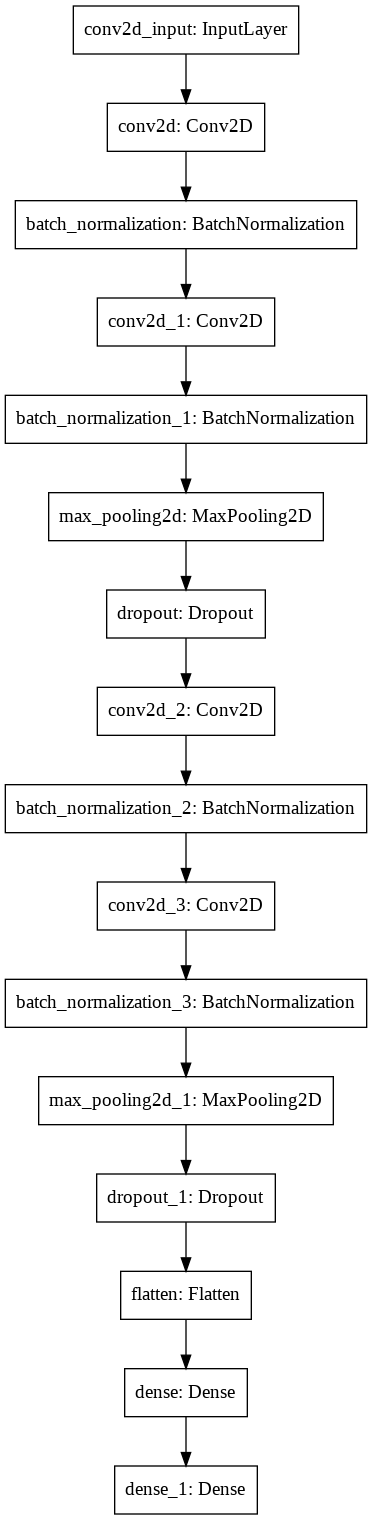

In [12]:
from IPython.display import SVG

keras.utils.plot_model(CNN_model,to_file='ffn.png')

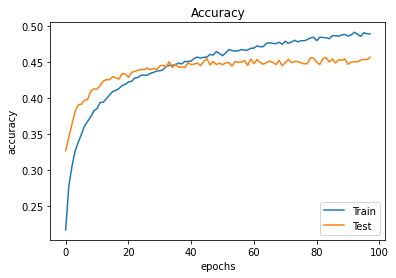

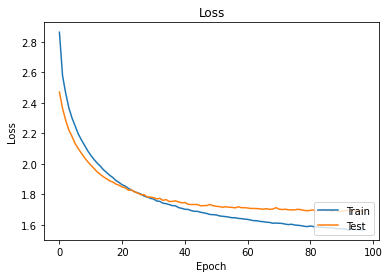

In [64]:
visualize(FFN_model.history)


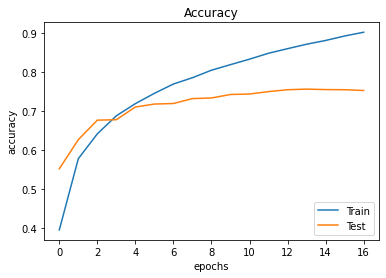

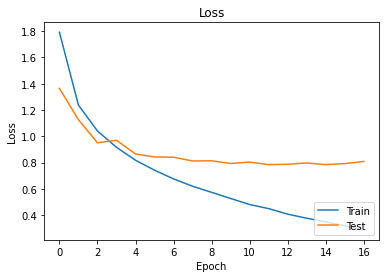

In [9]:
visualize(CNN_model.history)

In [0]:
cnn_pred = CNN_model.predict(x_test)

In [0]:
tl = np.zeros(10)
for i in range(0,10000):
  tl[y_test[i]] = tl[y_test[i]] +1

tl = tl / 10000

#--------------predicted distribution for CNN---------------
pl = np.zeros(10)
for i in range(0,10000):
  predicted_label = np.argmax(cnn_pred[i])
  true_label = y_test[i]
  if(predicted_label == true_label):
    pl[true_label] = pl[true_label] + 1
pl = pl / 10000



Text(0.5, 1.0, 'Predicted vs True Labels Distribution')

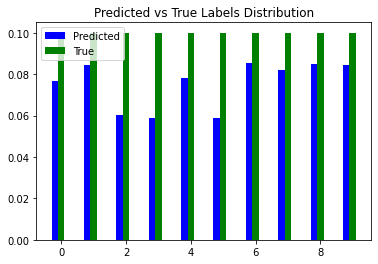

In [56]:
x = np.arange(10)
p1 = plt.subplot(1,1,1)

b1 = p1.bar(np.arange(10)-0.2,pl,width=0.2,color='b')
b2 = p1.bar(np.arange(10),tl,width=0.2,color='g')
p1.legend([b1,b2],['Predicted','True'],loc='upper left')
plt.title("Predicted vs True Labels Distribution")


In [57]:
CNN_model.evaluate(x_test,y_test)

313/313 [==============================] - 17s 55ms/step - loss: 0.8403 - accuracy: 0.7545


[0.8402857184410095, 0.7544999718666077]

In [59]:
FFN_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6972 - accuracy: 0.4350


[1.697173833847046, 0.4350000023841858]

Text(0.5, 1.0, 'Predicted vs True Labels Distribution')

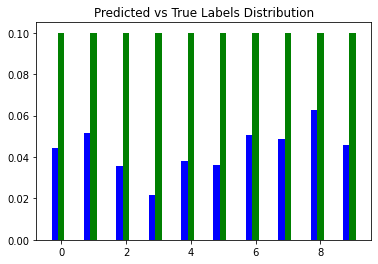

In [61]:
#--------------predicted distribution for FFN---------------
ffn_pred = FFN_model.predict(x_test)
pl = np.zeros(10)
for i in range(0,10000):
  predicted_label = np.argmax(ffn_pred[i])
  true_label = y_test[i]
  if(predicted_label == true_label):
    pl[true_label] = pl[true_label] + 1
pl = pl / 10000

x = np.arange(10)
p2 = plt.subplot(1,1,1)

b2 = p2.bar(np.arange(10)-0.2,pl,width=0.2,color='b')
b3 = p2.bar(np.arange(10),tl,width=0.2,color='g')
p1.legend([b2,b3],['Predicted','True'],loc='upper left')
plt.title("Predicted vs True Labels Distribution")